In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score

# Load the dataset
data = pd.read_csv('data/supermarket_sales.csv')

# Preview the data
print(data.head())

# Handle missing values if necessary
data.fillna(method='ffill', inplace=True)

# Label encoding for categorical variables
le = LabelEncoder()
categorical_cols = ['Gender', 'City', 'Customer type', 'Product line', 'Payment', 'Branch']
for col in categorical_cols:
    data[col] = le.fit_transform(data[col])

# Separate the target and features
X = data.drop(columns=['Total', 'Invoice ID', 'Product line', 'Date', 'Time', 'Payment'])
y = data['Total'] > data['Total'].mean()  # Binary classification: above/below average purchase value

    Invoice ID Branch       City Customer type  Gender  \
0  750-67-8428      A     Yangon        Member  Female   
1  226-31-3081      C  Naypyitaw        Normal  Female   
2  631-41-3108      A     Yangon        Normal    Male   
3  123-19-1176      A     Yangon        Member    Male   
4  373-73-7910      A     Yangon        Normal    Male   

             Product line  Unit price  Quantity   Tax 5%     Total       Date  \
0       Health and beauty       74.69         7  26.1415  548.9715   1/5/2019   
1  Electronic accessories       15.28         5   3.8200   80.2200   3/8/2019   
2      Home and lifestyle       46.33         7  16.2155  340.5255   3/3/2019   
3       Health and beauty       58.22         8  23.2880  489.0480  1/27/2019   
4       Sports and travel       86.31         7  30.2085  634.3785   2/8/2019   

    Time      Payment    cogs  gross margin percentage  gross income  Rating  
0  13:08      Ewallet  522.83                 4.761905       26.1415     9.1  
1  10:

C:\Users\USER\AppData\Local\Temp\ipykernel_3732\3415229453.py:18: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='ffill', inplace=True)


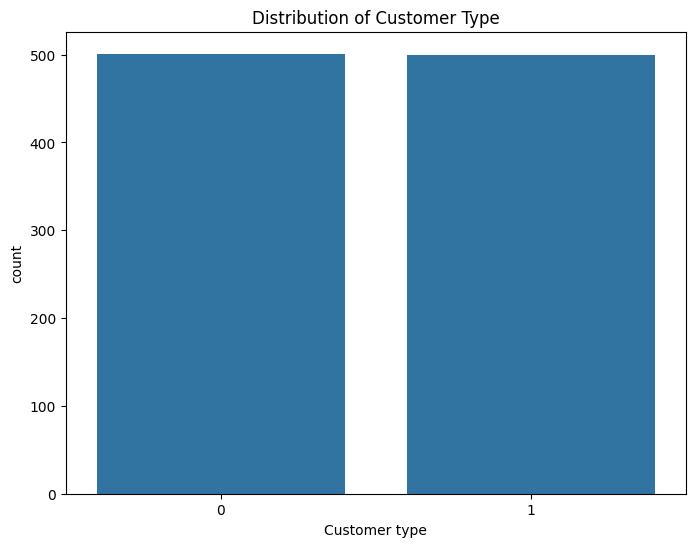

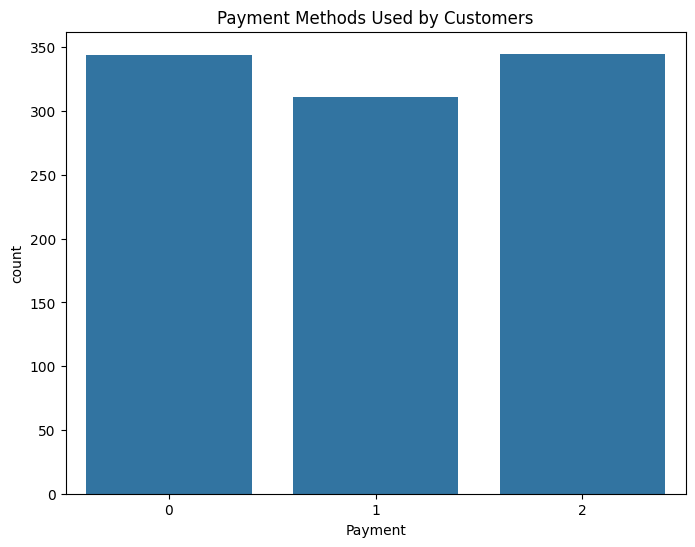

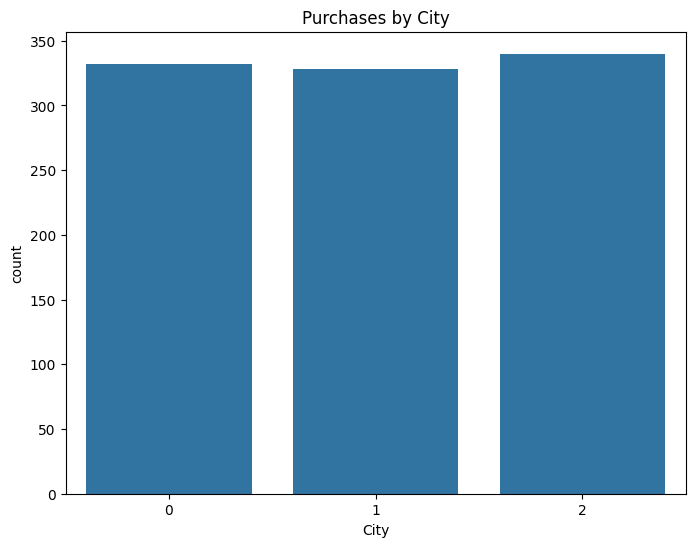

In [2]:
# Plot distribution of purchases across customer types
plt.figure(figsize=(8,6))
sns.countplot(x='Customer type', data=data)
plt.title('Distribution of Customer Type')
plt.savefig('images/customer_type_distribution.png')
plt.show()

# Payment method preferences
plt.figure(figsize=(8,6))
sns.countplot(x='Payment', data=data)
plt.title('Payment Methods Used by Customers')
plt.savefig('images/payment_methods.png')
plt.show()

# Distribution of purchases across cities
plt.figure(figsize=(8,6))
sns.countplot(x='City', data=data)
plt.title('Purchases by City')
plt.savefig('images/purchases_by_city.png')
plt.show()

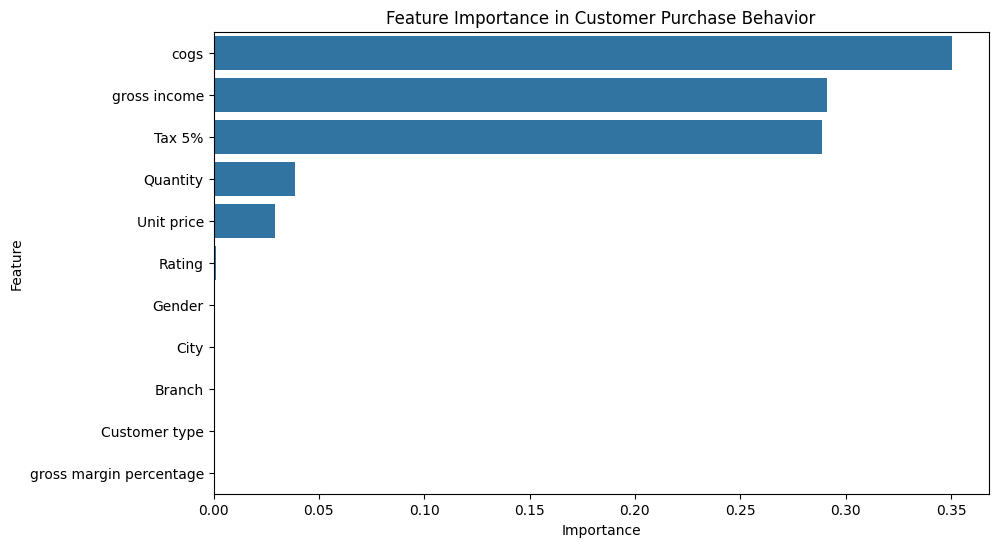

In [3]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest Classifier to get feature importance
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Get feature importance
importances = rf_model.feature_importances_
feature_names = X.columns

# Create a DataFrame for visualization
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(10,6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance in Customer Purchase Behavior')
plt.savefig('images/feature_importance.png')
plt.show()

In [4]:
# Display the sorted feature importance values
print(feature_importance_df)

# Recommendations based on feature importance
top_features = feature_importance_df[feature_importance_df['Importance'] > 0.05]
print("Top Influential Features:\n", top_features) 

                    Feature  Importance
7                      cogs    0.350322
9              gross income    0.291194
6                    Tax 5%    0.288925
5                  Quantity    0.038541
4                Unit price    0.029218
10                   Rating    0.001335
3                    Gender    0.000379
1                      City    0.000038
0                    Branch    0.000027
2             Customer type    0.000021
8   gross margin percentage    0.000000
Top Influential Features:
         Feature  Importance
7          cogs    0.350322
9  gross income    0.291194
6        Tax 5%    0.288925
